In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor  as vif

In [248]:
df = pd.read_csv('readydata.csv')

## Base model

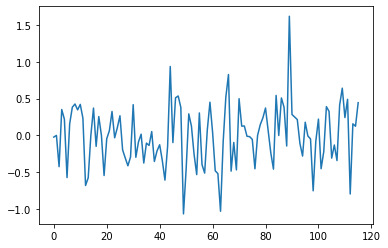

In [262]:
model = smf.ols("np.log(salary) ~ gender + experience + I(experience**2) + education + C(work_field) + has_subs", data=df)
model_est = model.fit()
plt.plot(model_est.resid)

In [247]:
model = smf.ols("np.log(salary) ~ gender + experience + I(experience**2) + education + C(work_field) + has_subs", data=df)
model_est = model.fit()

print("\n------SUMMARY------\n")
print(model_est.summary())

print("\n------Тест Зарембки------\n")
print(model_est.ssr)

print("\n------Тест Голдфелда-Квандта------\n")
print(sms.het_goldfeldquandt(y=model.endog, x=model.exog, idx = 2, split=.3, drop=.4))

print("\n------Тест Глейзера------\n")
from scipy.stats import chi2
model_aux = smf.ols("abs(model_est.resid) ~ has_subs", data=df)
model_aux_est = model_aux.fit()
stat_aux = model_aux_est.ess / ((1 - 2 / np.pi) * np.var(model_est.resid))
print(f"Stat: {stat_aux:5.4f}, Critical value: {chi2.ppf(0.95, df=model_aux.df_model):5.4f}, \
p-value: {1 - chi2.cdf(stat_aux, df=model_aux.df_model):5.4f}")


print("\n------Тест Бройша-Пагана------\n")
# .
print(sms.het_breuschpagan(model_est.resid, model.exog))

print("\n------VIF-тест на мультиколлинеарность------\n")
# 
for i in range(1, model.exog.shape[1]):
    vif_est = vif(model.exog, i)
    print(f"{model_est.params.index[i]:30}: {vif_est:5.4f}")
    

print("\n------Тест Дарбина-Уотсона------\n")
print(sms.durbin_watson(model_est.resid))


------SUMMARY------

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     3.200
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           4.89e-05
Time:                        05:45:03   Log-Likelihood:                -60.511
No. Observations:                 116   AIC:                             167.0
Df Residuals:                      93   BIC:                             230.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## All-variable model

In [250]:
model = smf.ols("np.log(salary) ~ gender + experience + I(experience**2) + mariage_status + children + health_problems + health_lvl + education + workweek + C(work_field) + has_subs + count_subs", data=df)
model_est = model.fit()

print("\n------SUMMARY------\n")
print(model_est.summary())

print("\n------Тест Зарембки------\n")
print(model_est.ssr)

print("\n------Тест Голдфелда-Квандта------\n")
print(sms.het_goldfeldquandt(y=model.endog, x=model.exog, idx = 2, split=.3, drop=.4))

print("\n------Тест Глейзера------\n")
from scipy.stats import chi2
model_aux = smf.ols("abs(model_est.resid) ~ has_subs", data=df)
model_aux_est = model_aux.fit()
stat_aux = model_aux_est.ess / ((1 - 2 / np.pi) * np.var(model_est.resid))
print(f"Stat: {stat_aux:5.4f}, Critical value: {chi2.ppf(0.95, df=model_aux.df_model):5.4f}, \
p-value: {1 - chi2.cdf(stat_aux, df=model_aux.df_model):5.4f}")


print("\n------Тест Бройша-Пагана------\n")
# .
print(sms.het_breuschpagan(model_est.resid, model.exog))

print("\n------VIF-тест на мультиколлинеарность------\n")
# 
for i in range(1, model.exog.shape[1]):
    vif_est = vif(model.exog, i)
    print(f"{model_est.params.index[i]:30}: {vif_est:5.4f}")
    

print("\n------Тест Дарбина-Уотсона------\n")
print(sms.durbin_watson(model_est.resid))


------SUMMARY------

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     3.149
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.38e-05
Time:                        05:50:00   Log-Likelihood:                -52.609
No. Observations:                 116   AIC:                             163.2
Df Residuals:                      87   BIC:                             243.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Base + Mariage

In [251]:
model = smf.ols("np.log(salary) ~ gender + experience + I(experience**2) + mariage_status + education + C(work_field) + has_subs", data=df)
model_est = model.fit()

print("\n------SUMMARY------\n")
print(model_est.summary())

print("\n------Тест Зарембки------\n")
print(model_est.ssr)

print("\n------Тест Голдфелда-Квандта------\n")
print(sms.het_goldfeldquandt(y=model.endog, x=model.exog, idx = 2, split=.3, drop=.4))

print("\n------Тест Глейзера------\n")
from scipy.stats import chi2
model_aux = smf.ols("abs(model_est.resid) ~ has_subs", data=df)
model_aux_est = model_aux.fit()
stat_aux = model_aux_est.ess / ((1 - 2 / np.pi) * np.var(model_est.resid))
print(f"Stat: {stat_aux:5.4f}, Critical value: {chi2.ppf(0.95, df=model_aux.df_model):5.4f}, \
p-value: {1 - chi2.cdf(stat_aux, df=model_aux.df_model):5.4f}")


print("\n------Тест Бройша-Пагана------\n")
# .
print(sms.het_breuschpagan(model_est.resid, model.exog))

print("\n------VIF-тест на мультиколлинеарность------\n")
# 
for i in range(1, model.exog.shape[1]):
    vif_est = vif(model.exog, i)
    print(f"{model_est.params.index[i]:30}: {vif_est:5.4f}")
    

print("\n------Тест Дарбина-Уотсона------\n")
print(sms.durbin_watson(model_est.resid))


------SUMMARY------

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     3.029
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           9.03e-05
Time:                        05:52:11   Log-Likelihood:                -60.503
No. Observations:                 116   AIC:                             169.0
Df Residuals:                      92   BIC:                             235.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Base + children

In [252]:
model = smf.ols("np.log(salary) ~ gender + experience + I(experience**2) + mariage_status + children + education + C(work_field) + has_subs", data=df)
model_est = model.fit()

print("\n------SUMMARY------\n")
print(model_est.summary())

print("\n------Тест Зарембки------\n")
print(model_est.ssr)

print("\n------Тест Голдфелда-Квандта------\n")
print(sms.het_goldfeldquandt(y=model.endog, x=model.exog, idx = 2, split=.3, drop=.4))

print("\n------Тест Глейзера------\n")
from scipy.stats import chi2
model_aux = smf.ols("abs(model_est.resid) ~ has_subs", data=df)
model_aux_est = model_aux.fit()
stat_aux = model_aux_est.ess / ((1 - 2 / np.pi) * np.var(model_est.resid))
print(f"Stat: {stat_aux:5.4f}, Critical value: {chi2.ppf(0.95, df=model_aux.df_model):5.4f}, \
p-value: {1 - chi2.cdf(stat_aux, df=model_aux.df_model):5.4f}")


print("\n------Тест Бройша-Пагана------\n")
# .
print(sms.het_breuschpagan(model_est.resid, model.exog))

print("\n------VIF-тест на мультиколлинеарность------\n")
# 
for i in range(1, model.exog.shape[1]):
    vif_est = vif(model.exog, i)
    print(f"{model_est.params.index[i]:30}: {vif_est:5.4f}")
    

print("\n------Тест Дарбина-Уотсона------\n")
print(sms.durbin_watson(model_est.resid))


------SUMMARY------

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2.871
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           0.000163
Time:                        05:53:20   Log-Likelihood:                -60.503
No. Observations:                 116   AIC:                             171.0
Df Residuals:                      91   BIC:                             239.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Base + health

In [258]:
model = smf.ols("np.log(salary) ~ gender + experience + I(experience**2) + health_problems + health_lvl + education + C(work_field) + has_subs", data=df)
model_est = model.fit()

print("\n------SUMMARY------\n")
print(model_est.summary())

print("\n------Тест Зарембки------\n")
print(model_est.ssr)

print("\n------Тест Голдфелда-Квандта------\n")
print(sms.het_goldfeldquandt(y=model.endog, x=model.exog, idx = 2, split=.3, drop=.4))

print("\n------Тест Глейзера------\n")
from scipy.stats import chi2
model_aux = smf.ols("abs(model_est.resid) ~ has_subs", data=df)
model_aux_est = model_aux.fit()
stat_aux = model_aux_est.ess / ((1 - 2 / np.pi) * np.var(model_est.resid))
print(f"Stat: {stat_aux:5.4f}, Critical value: {chi2.ppf(0.95, df=model_aux.df_model):5.4f}, \
p-value: {1 - chi2.cdf(stat_aux, df=model_aux.df_model):5.4f}")


print("\n------Тест Бройша-Пагана------\n")
# .
print(sms.het_breuschpagan(model_est.resid, model.exog))

print("\n------VIF-тест на мультиколлинеарность------\n")
# 
for i in range(1, model.exog.shape[1]):
    vif_est = vif(model.exog, i)
    print(f"{model_est.params.index[i]:30}: {vif_est:5.4f}")
    

print("\n------Тест Дарбина-Уотсона------\n")
print(sms.durbin_watson(model_est.resid))


------SUMMARY------

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     3.250
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           3.22e-05
Time:                        06:08:14   Log-Likelihood:                -58.711
No. Observations:                 116   AIC:                             165.4
Df Residuals:                      92   BIC:                             231.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## ТЕСТ ХАУСМАНА

In [261]:
# 1 ШАГ
model_child = smf.ols("children ~ gender + experience + I(experience**2) + education + C(work_field) + has_subs", data=df)
model_child_est = model_child.fit()

model_health = smf.ols("health_lvl ~ gender + experience + I(experience**2) + education + C(work_field) + has_subs", data=df)
model_health_est = model_health.fit()

model_regular = smf.ols("mariage_status ~ gender + experience + I(experience**2) + education + C(work_field) + has_subs", data=df)
model_regular_est = model_regular.fit()

# 2 ШАГ
child = pd.DataFrame(model_child_est.resid, columns = ['child_resid'])
health = pd.DataFrame(model_health_est.resid, columns = ['health_resid'])
regular = pd.DataFrame(model_regular_est.resid, columns = ['mariage_resid'])

new_data = df.join(child)
new_data = new_data.join(health)
new_data = new_data.join(regular)

model_test = smf.ols("np.log(salary) ~ children + health_lvl + mariage_status + child_resid + health_resid + mariage_resid", data=new_data)
model_test_est = model_test.fit()
print(model_test_est.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.038
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0666
Time:                        06:09:38   Log-Likelihood:                -87.034
No. Observations:                 116   AIC:                             188.1
Df Residuals:                     109   BIC:                             207.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.8682      0.578     17.